MNISTを用いたバッチノーマライゼーションの評価

In [1]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

In [2]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 学習データを削減
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01

In [3]:
def __train(weight_init_std):
    #バッチノルムを有効に
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10, 
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            #勾配の計算
            grads = _network.gradient(x_batch, t_batch)
            #重みの最適化と更新
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list

============== 1/16 ==============
epoch:0 | 0.117 - 0.101
epoch:1 | 0.097 - 0.106


..\common\functions.py:34: RuntimeWarning: invalid value encountered in subtract
  x = x - np.max(x, axis=0)
..\common\layers.py:12: RuntimeWarning: invalid value encountered in less_equal
  self.mask = (x <= 0)


epoch:2 | 0.097 - 0.109
epoch:3 | 0.097 - 0.149
epoch:4 | 0.097 - 0.176
epoch:5 | 0.097 - 0.197
epoch:6 | 0.097 - 0.212
epoch:7 | 0.097 - 0.243
epoch:8 | 0.097 - 0.258
epoch:9 | 0.097 - 0.272
epoch:10 | 0.097 - 0.288
epoch:11 | 0.097 - 0.293
epoch:12 | 0.097 - 0.311
epoch:13 | 0.097 - 0.328
epoch:14 | 0.097 - 0.345
epoch:15 | 0.097 - 0.356
epoch:16 | 0.097 - 0.369


No handles with labels found to put in legend.


epoch:17 | 0.097 - 0.379
epoch:18 | 0.097 - 0.4
epoch:19 | 0.097 - 0.399
============== 2/16 ==============
epoch:0 | 0.1 - 0.095


..\common\multi_layer_net_extend.py:101: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
..\common\multi_layer_net_extend.py:101: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)


epoch:1 | 0.093 - 0.091
epoch:2 | 0.097 - 0.112
epoch:3 | 0.097 - 0.13
epoch:4 | 0.097 - 0.15
epoch:5 | 0.097 - 0.171
epoch:6 | 0.097 - 0.19
epoch:7 | 0.097 - 0.214
epoch:8 | 0.097 - 0.23
epoch:9 | 0.097 - 0.259
epoch:10 | 0.097 - 0.291
epoch:11 | 0.097 - 0.315
epoch:12 | 0.097 - 0.332
epoch:13 | 0.097 - 0.356
epoch:14 | 0.097 - 0.365
epoch:15 | 0.097 - 0.385
epoch:16 | 0.097 - 0.411
epoch:17 | 0.097 - 0.426
epoch:18 | 0.097 - 0.443


No handles with labels found to put in legend.


epoch:19 | 0.097 - 0.456
============== 3/16 ==============
epoch:0 | 0.109 - 0.141
epoch:1 | 0.27 - 0.164
epoch:2 | 0.462 - 0.195
epoch:3 | 0.56 - 0.237
epoch:4 | 0.642 - 0.279
epoch:5 | 0.697 - 0.308
epoch:6 | 0.728 - 0.332
epoch:7 | 0.793 - 0.37
epoch:8 | 0.81 - 0.4
epoch:9 | 0.848 - 0.414
epoch:10 | 0.868 - 0.455
epoch:11 | 0.9 - 0.471
epoch:12 | 0.921 - 0.497
epoch:13 | 0.929 - 0.528
epoch:14 | 0.933 - 0.544
epoch:15 | 0.947 - 0.559
epoch:16 | 0.95 - 0.585
epoch:17 | 0.963 - 0.608
epoch:18 | 0.968 - 0.626
epoch:19 | 0.977 - 0.648


No handles with labels found to put in legend.


============== 4/16 ==============
epoch:0 | 0.088 - 0.091
epoch:1 | 0.232 - 0.146
epoch:2 | 0.327 - 0.238
epoch:3 | 0.426 - 0.313
epoch:4 | 0.507 - 0.381
epoch:5 | 0.596 - 0.429
epoch:6 | 0.651 - 0.487
epoch:7 | 0.693 - 0.523
epoch:8 | 0.716 - 0.561
epoch:9 | 0.748 - 0.598
epoch:10 | 0.761 - 0.626
epoch:11 | 0.757 - 0.653
epoch:12 | 0.795 - 0.664
epoch:13 | 0.815 - 0.688
epoch:14 | 0.811 - 0.713
epoch:15 | 0.827 - 0.728
epoch:16 | 0.84 - 0.743
epoch:17 | 0.842 - 0.75
epoch:18 | 0.86 - 0.765


No handles with labels found to put in legend.


epoch:19 | 0.852 - 0.777
============== 5/16 ==============
epoch:0 | 0.07 - 0.072
epoch:1 | 0.083 - 0.13
epoch:2 | 0.093 - 0.298
epoch:3 | 0.109 - 0.41
epoch:4 | 0.121 - 0.493
epoch:5 | 0.124 - 0.534
epoch:6 | 0.13 - 0.581
epoch:7 | 0.14 - 0.625
epoch:8 | 0.143 - 0.661
epoch:9 | 0.153 - 0.689
epoch:10 | 0.156 - 0.72
epoch:11 | 0.168 - 0.749
epoch:12 | 0.186 - 0.77
epoch:13 | 0.202 - 0.777
epoch:14 | 0.217 - 0.798
epoch:15 | 0.214 - 0.813
epoch:16 | 0.228 - 0.826
epoch:17 | 0.25 - 0.839


No handles with labels found to put in legend.


epoch:18 | 0.276 - 0.848
epoch:19 | 0.291 - 0.859
============== 6/16 ==============
epoch:0 | 0.095 - 0.091
epoch:1 | 0.093 - 0.175
epoch:2 | 0.1 - 0.434
epoch:3 | 0.089 - 0.635
epoch:4 | 0.098 - 0.715
epoch:5 | 0.093 - 0.775
epoch:6 | 0.101 - 0.805
epoch:7 | 0.115 - 0.822
epoch:8 | 0.117 - 0.843
epoch:9 | 0.116 - 0.862
epoch:10 | 0.122 - 0.882
epoch:11 | 0.126 - 0.894
epoch:12 | 0.117 - 0.906
epoch:13 | 0.117 - 0.916
epoch:14 | 0.139 - 0.924
epoch:15 | 0.139 - 0.935
epoch:16 | 0.128 - 0.94
epoch:17 | 0.116 - 0.942
epoch:18 | 0.116 - 0.95


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.953
============== 7/16 ==============
epoch:0 | 0.1 - 0.12
epoch:1 | 0.1 - 0.271
epoch:2 | 0.117 - 0.545
epoch:3 | 0.117 - 0.664
epoch:4 | 0.117 - 0.735
epoch:5 | 0.117 - 0.779
epoch:6 | 0.117 - 0.82
epoch:7 | 0.117 - 0.85
epoch:8 | 0.117 - 0.869
epoch:9 | 0.117 - 0.891
epoch:10 | 0.117 - 0.919
epoch:11 | 0.117 - 0.927
epoch:12 | 0.117 - 0.949
epoch:13 | 0.117 - 0.96
epoch:14 | 0.117 - 0.967
epoch:15 | 0.116 - 0.975
epoch:16 | 0.138 - 0.979
epoch:17 | 0.117 - 0.982
epoch:18 | 0.117 - 0.987


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.987
============== 8/16 ==============
epoch:0 | 0.099 - 0.093
epoch:1 | 0.117 - 0.391
epoch:2 | 0.117 - 0.678
epoch:3 | 0.117 - 0.772
epoch:4 | 0.117 - 0.823
epoch:5 | 0.116 - 0.88
epoch:6 | 0.117 - 0.921
epoch:7 | 0.117 - 0.95
epoch:8 | 0.117 - 0.95
epoch:9 | 0.117 - 0.966
epoch:10 | 0.117 - 0.978
epoch:11 | 0.116 - 0.987
epoch:12 | 0.116 - 0.988
epoch:13 | 0.116 - 0.991
epoch:14 | 0.116 - 0.992
epoch:15 | 0.116 - 0.995
epoch:16 | 0.117 - 0.997


No handles with labels found to put in legend.


epoch:17 | 0.117 - 0.997
epoch:18 | 0.117 - 0.997
epoch:19 | 0.117 - 0.998
============== 9/16 ==============
epoch:0 | 0.117 - 0.071
epoch:1 | 0.116 - 0.448
epoch:2 | 0.116 - 0.766
epoch:3 | 0.116 - 0.872
epoch:4 | 0.116 - 0.92
epoch:5 | 0.116 - 0.946
epoch:6 | 0.116 - 0.966
epoch:7 | 0.117 - 0.982
epoch:8 | 0.117 - 0.984
epoch:9 | 0.117 - 0.992
epoch:10 | 0.117 - 0.997
epoch:11 | 0.117 - 0.998
epoch:12 | 0.117 - 0.998
epoch:13 | 0.117 - 0.999
epoch:14 | 0.117 - 1.0
epoch:15 | 0.117 - 1.0
epoch:16 | 0.117 - 1.0
epoch:17 | 0.117 - 1.0


No handles with labels found to put in legend.


epoch:18 | 0.117 - 1.0
epoch:19 | 0.116 - 1.0
============== 10/16 ==============
epoch:0 | 0.094 - 0.16
epoch:1 | 0.117 - 0.61
epoch:2 | 0.117 - 0.779
epoch:3 | 0.117 - 0.852
epoch:4 | 0.117 - 0.852
epoch:5 | 0.117 - 0.911
epoch:6 | 0.117 - 0.965
epoch:7 | 0.117 - 0.961
epoch:8 | 0.117 - 0.986
epoch:9 | 0.117 - 0.978
epoch:10 | 0.117 - 0.993
epoch:11 | 0.117 - 0.996
epoch:12 | 0.117 - 0.992
epoch:13 | 0.117 - 0.997
epoch:14 | 0.117 - 0.998
epoch:15 | 0.117 - 0.998
epoch:16 | 0.117 - 0.998
epoch:17 | 0.117 - 0.998
epoch:18 | 0.117 - 0.998


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.998
============== 11/16 ==============
epoch:0 | 0.093 - 0.11
epoch:1 | 0.117 - 0.56
epoch:2 | 0.117 - 0.697
epoch:3 | 0.117 - 0.721
epoch:4 | 0.117 - 0.719
epoch:5 | 0.117 - 0.847
epoch:6 | 0.117 - 0.836
epoch:7 | 0.117 - 0.834
epoch:8 | 0.117 - 0.885
epoch:9 | 0.117 - 0.857
epoch:10 | 0.116 - 0.894
epoch:11 | 0.116 - 0.894
epoch:12 | 0.116 - 0.986
epoch:13 | 0.116 - 0.937
epoch:14 | 0.116 - 0.983
epoch:15 | 0.116 - 0.984
epoch:16 | 0.116 - 0.989
epoch:17 | 0.116 - 0.993


No handles with labels found to put in legend.


epoch:18 | 0.116 - 0.996
epoch:19 | 0.117 - 0.996
============== 12/16 ==============
epoch:0 | 0.105 - 0.122
epoch:1 | 0.105 - 0.662
epoch:2 | 0.117 - 0.735
epoch:3 | 0.117 - 0.825
epoch:4 | 0.117 - 0.841
epoch:5 | 0.117 - 0.821
epoch:6 | 0.117 - 0.852
epoch:7 | 0.117 - 0.838
epoch:8 | 0.117 - 0.884
epoch:9 | 0.117 - 0.884
epoch:10 | 0.117 - 0.979
epoch:11 | 0.117 - 0.977
epoch:12 | 0.117 - 0.987
epoch:13 | 0.117 - 0.987
epoch:14 | 0.117 - 0.988
epoch:15 | 0.117 - 0.98
epoch:16 | 0.117 - 0.992
epoch:17 | 0.117 - 0.989
epoch:18 | 0.117 - 0.993


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.993
============== 13/16 ==============
epoch:0 | 0.116 - 0.099
epoch:1 | 0.116 - 0.468
epoch:2 | 0.116 - 0.568
epoch:3 | 0.117 - 0.471
epoch:4 | 0.117 - 0.598
epoch:5 | 0.117 - 0.604
epoch:6 | 0.117 - 0.608
epoch:7 | 0.117 - 0.613
epoch:8 | 0.117 - 0.659
epoch:9 | 0.117 - 0.635
epoch:10 | 0.117 - 0.617
epoch:11 | 0.117 - 0.693
epoch:12 | 0.117 - 0.687
epoch:13 | 0.117 - 0.684
epoch:14 | 0.117 - 0.704
epoch:15 | 0.117 - 0.723
epoch:16 | 0.117 - 0.752


No handles with labels found to put in legend.


epoch:17 | 0.117 - 0.794
epoch:18 | 0.117 - 0.789
epoch:19 | 0.117 - 0.802
============== 14/16 ==============
epoch:0 | 0.116 - 0.116
epoch:1 | 0.116 - 0.366
epoch:2 | 0.116 - 0.398
epoch:3 | 0.116 - 0.417
epoch:4 | 0.116 - 0.427
epoch:5 | 0.116 - 0.488
epoch:6 | 0.116 - 0.491
epoch:7 | 0.116 - 0.502
epoch:8 | 0.116 - 0.509
epoch:9 | 0.116 - 0.5
epoch:10 | 0.116 - 0.516
epoch:11 | 0.116 - 0.515
epoch:12 | 0.116 - 0.5
epoch:13 | 0.116 - 0.518
epoch:14 | 0.116 - 0.515
epoch:15 | 0.116 - 0.523
epoch:16 | 0.116 - 0.514
epoch:17 | 0.116 - 0.519


No handles with labels found to put in legend.


epoch:18 | 0.116 - 0.524
epoch:19 | 0.116 - 0.494
============== 15/16 ==============
epoch:0 | 0.097 - 0.097
epoch:1 | 0.116 - 0.296
epoch:2 | 0.116 - 0.387
epoch:3 | 0.117 - 0.39
epoch:4 | 0.116 - 0.396
epoch:5 | 0.116 - 0.401
epoch:6 | 0.117 - 0.451
epoch:7 | 0.116 - 0.396
epoch:8 | 0.116 - 0.418
epoch:9 | 0.116 - 0.418
epoch:10 | 0.116 - 0.426
epoch:11 | 0.116 - 0.412
epoch:12 | 0.116 - 0.424
epoch:13 | 0.116 - 0.423
epoch:14 | 0.116 - 0.446
epoch:15 | 0.116 - 0.443
epoch:16 | 0.116 - 0.47
epoch:17 | 0.116 - 0.476
epoch:18 | 0.116 - 0.496


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.512
============== 16/16 ==============
epoch:0 | 0.116 - 0.185
epoch:1 | 0.116 - 0.216
epoch:2 | 0.116 - 0.214
epoch:3 | 0.116 - 0.208
epoch:4 | 0.116 - 0.31
epoch:5 | 0.116 - 0.395
epoch:6 | 0.116 - 0.382
epoch:7 | 0.116 - 0.416
epoch:8 | 0.116 - 0.425
epoch:9 | 0.116 - 0.427
epoch:10 | 0.116 - 0.411
epoch:11 | 0.116 - 0.425
epoch:12 | 0.116 - 0.452
epoch:13 | 0.116 - 0.428
epoch:14 | 0.116 - 0.449
epoch:15 | 0.116 - 0.415
epoch:16 | 0.116 - 0.327
epoch:17 | 0.117 - 0.452
epoch:18 | 0.116 - 0.524
epoch:19 | 0.117 - 0.515


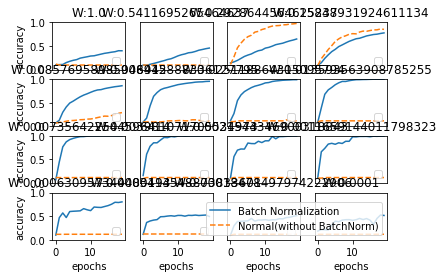

In [4]:
# 3.グラフの描画==========
#ログスケールに均等な配列を生成する 
#重みの
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)
#インデックス番号、要素の順に取得
for i, w in enumerate(weight_scale_list):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)
    
    plt.subplot(4,4,i+1)
    plt.title("W:" + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    plt.legend(loc='lower right')
    
plt.show()